In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PyAstronomy import pyasl
from datetime import datetime

from FIESTA_functions import *
from HARPS_N_functions import *

#----------------------------------
# Read data
#----------------------------------

v_grid  = np.loadtxt('./lib/data_v4/v_grid.txt')
CCF     = np.loadtxt('./lib/data_v4/CCF.txt')
σCCF   = np.loadtxt('./lib/data_v4/σCCF.txt')
bjd     = np.loadtxt('./lib/data_v4/bjd.txt')
rv      = np.loadtxt('./lib/data_v4/rv.txt')
σrv     = np.loadtxt('./lib/data_v4/σrv.txt')
idx_rej = np.array(np.loadtxt('./lib/data_v4/idx_rej'), dtype=bool)

In [4]:
len(bjd)

CCF.shape

(95, 31795)

Then go to the end of the file 

In [8]:
start_date = datetime(2021, 5, 28)
end_date = datetime(2021, 5, 28)
# end_date = datetime(2021, 5, 29)

T1 = pyasl.jdcnv(start_date)
T2 = pyasl.jdcnv(end_date)
idx = (bjd>=T1) & (bjd<=T2+1) & (~idx_rej)

In [11]:
np.mean(CCF[:, idx], axis=1)

array([0.01632974, 0.01664867, 0.0170075 , 0.01743688, 0.01794421,
       0.01851642, 0.01918218, 0.01993744, 0.02082744, 0.02183859,
       0.02301654, 0.02438863, 0.02591669, 0.02775148, 0.02981261,
       0.03219652, 0.03498458, 0.03807896, 0.04169685, 0.04578342,
       0.05042371, 0.05572496, 0.06167031, 0.06842113, 0.07597979,
       0.08446028, 0.09387288, 0.10432377, 0.11580763, 0.12833717,
       0.14206533, 0.15672242, 0.17254167, 0.18931326, 0.20679804,
       0.2252118 , 0.24393298, 0.26302369, 0.28229459, 0.30107528,
       0.31949735, 0.33701969, 0.35322278, 0.36806153, 0.3809883 ,
       0.3917746 , 0.400257  , 0.40611753, 0.40923672, 0.40951333,
       0.40693475, 0.40151617, 0.39335667, 0.38273614, 0.36977109,
       0.35475806, 0.33817238, 0.32016551, 0.30114439, 0.28163308,
       0.26169147, 0.24180177, 0.2223768 , 0.20332568, 0.18514087,
       0.1679359 , 0.1515632 , 0.13644814, 0.12244584, 0.10947929,
       0.0977927 , 0.08709863, 0.07740641, 0.06879325, 0.06099

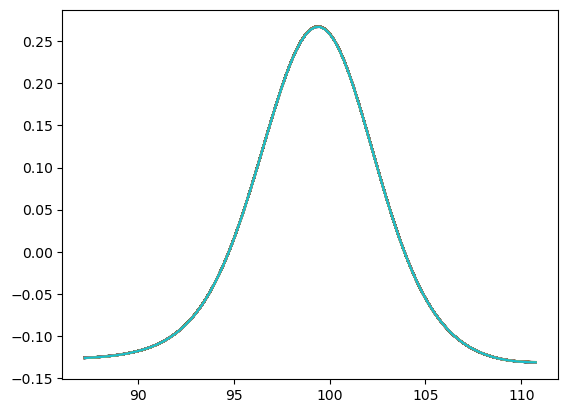

In [12]:
plt.plot(v_grid, CCF[:, idx] - np.mean(CCF[:, idx]))
plt.show()

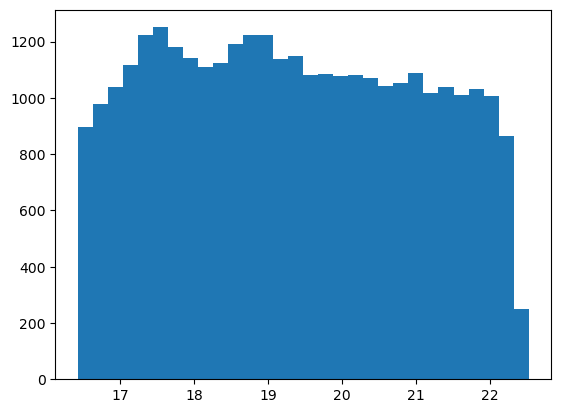

In [13]:
time = (bjd-[int(bjd[i]+0.5) for i in np.arange(len(bjd))]+0.5)*24
plt.hist(time, bins = 30)
plt.show()

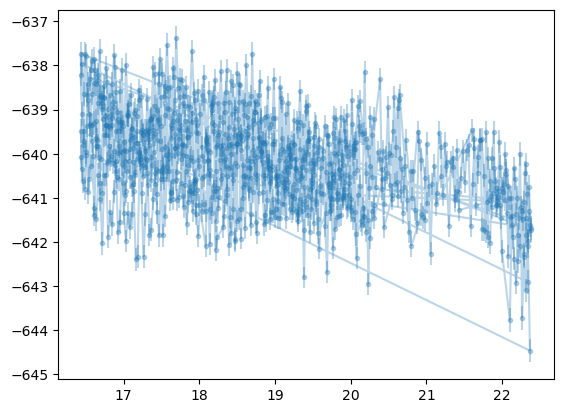

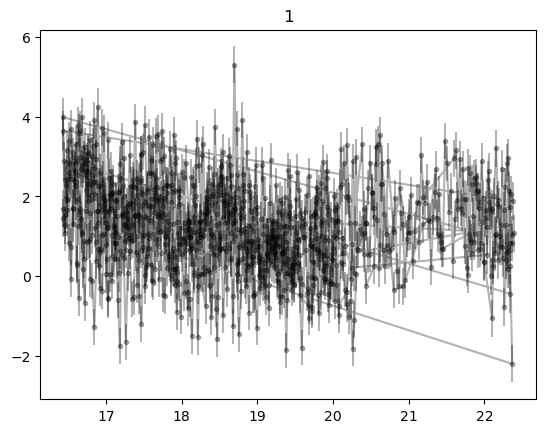

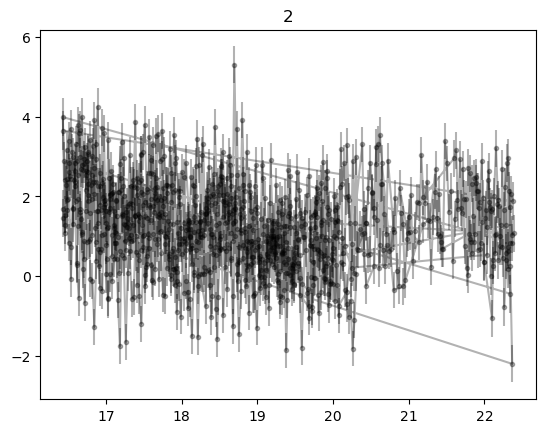

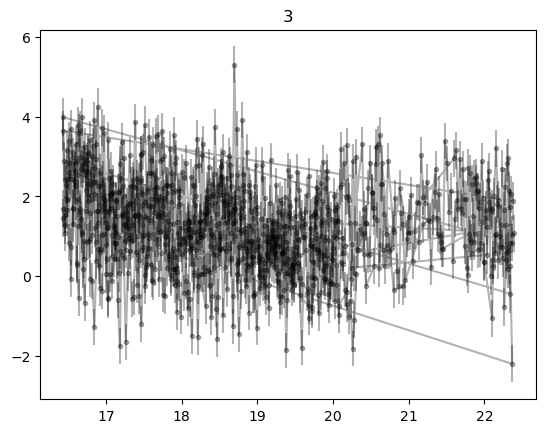

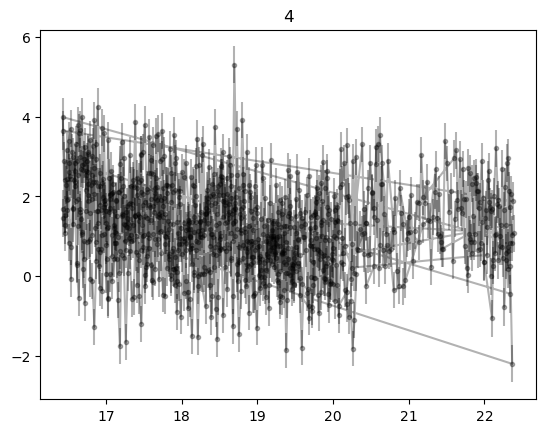

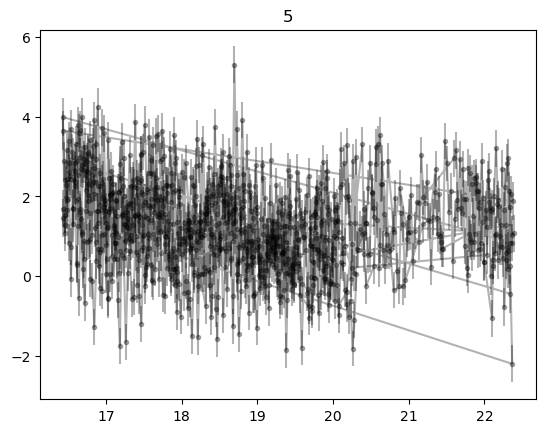

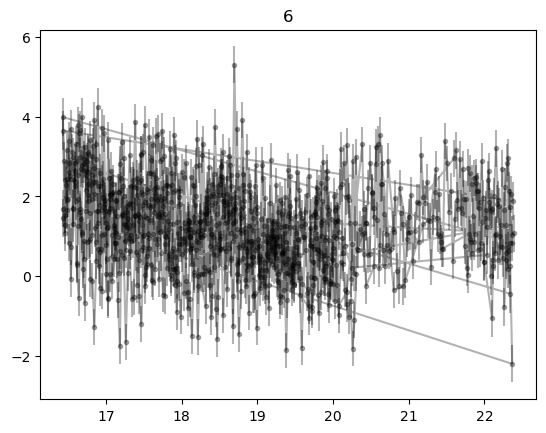

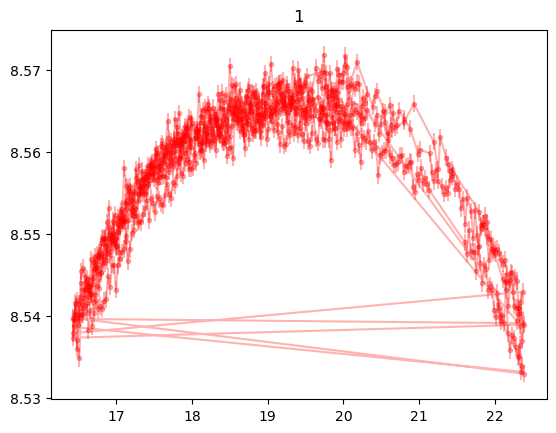

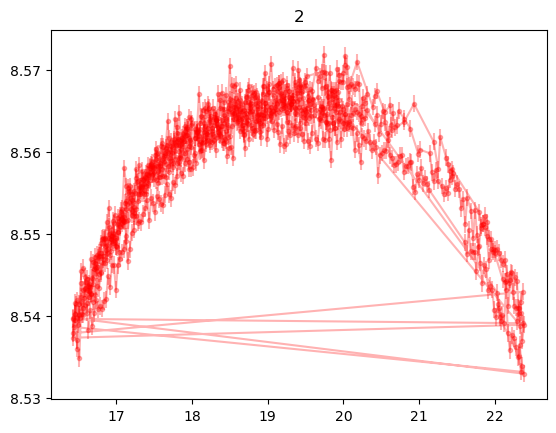

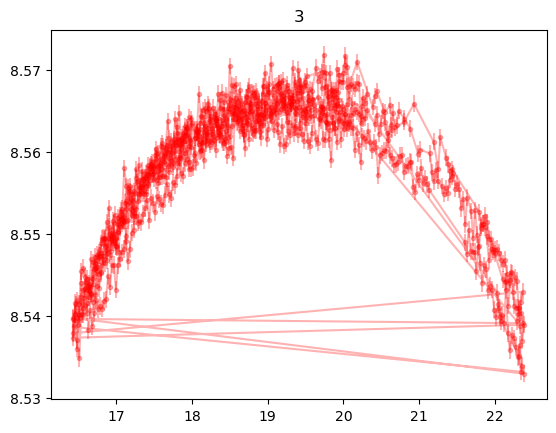

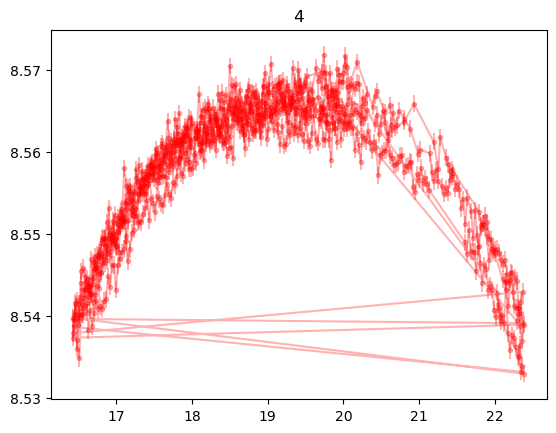

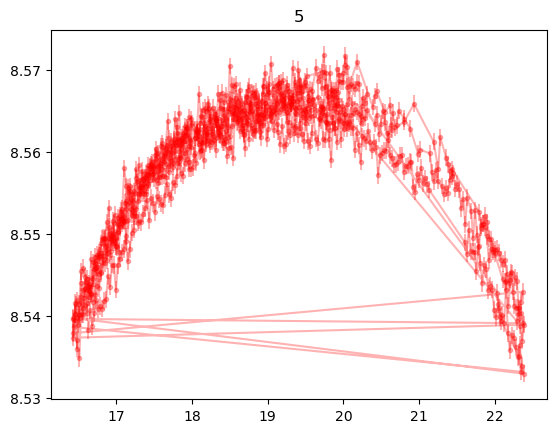

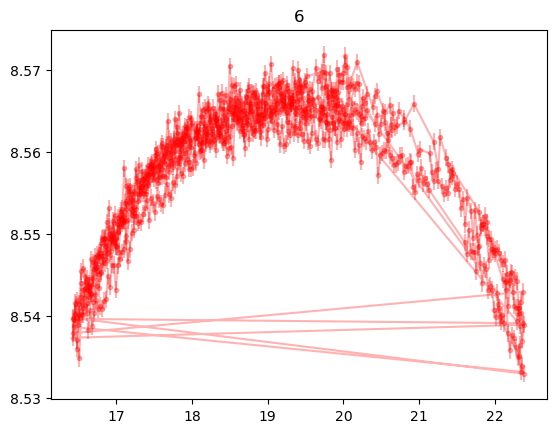

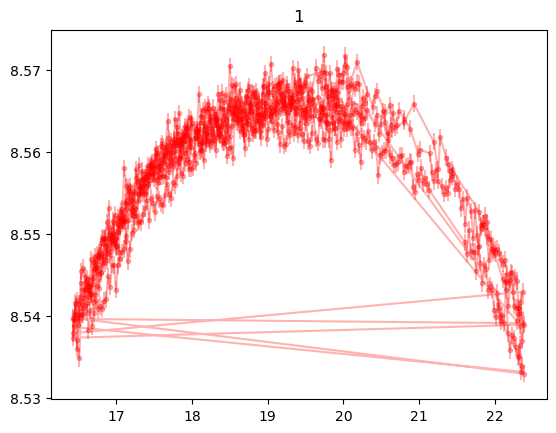

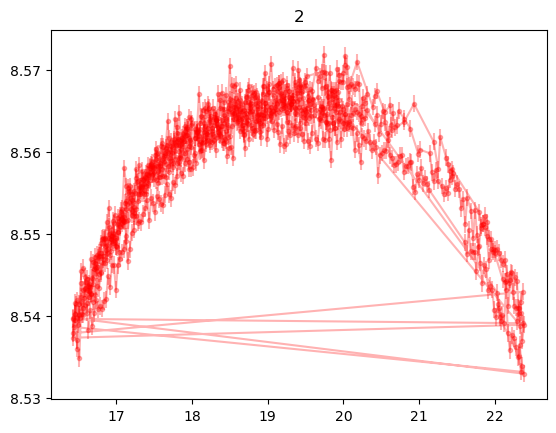

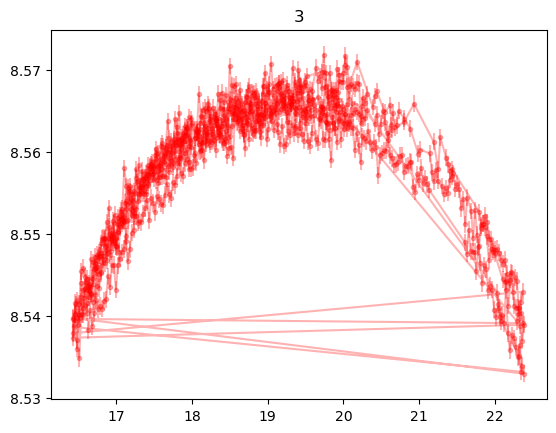

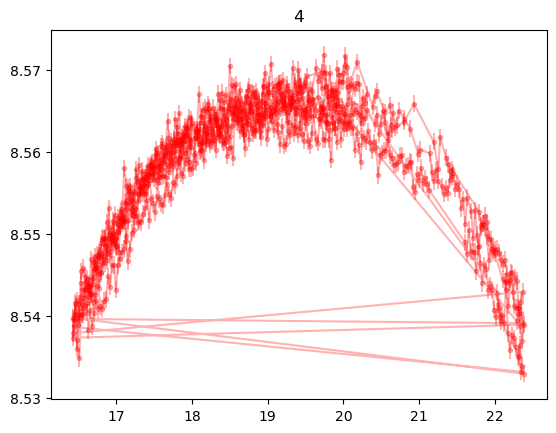

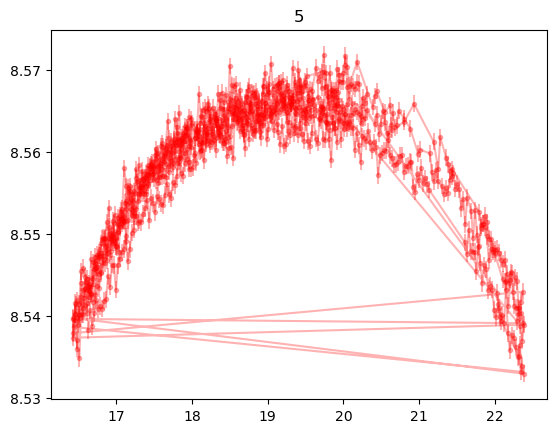

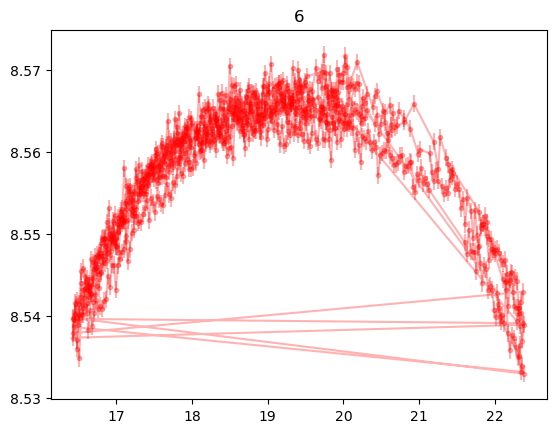

In [14]:
idx = np.arange(1000) 
plt.errorbar(time[idx], rv[idx], σrv[idx], marker='.', alpha=0.3)
plt.show()

for i in range(6):
    plt.title(str(i+1))
    plt.errorbar(time[idx], shift_spectrum[0,idx], err_shift_spectrum[0,idx], marker='.', color='k', alpha=0.3)
    plt.show()

for i in range(6):
    plt.title(str(i+1))
    plt.errorbar(time[idx], power_spectrum[0,idx], err_power_spectrum[0,idx], marker='.', color='r', alpha=0.3)
    plt.show()

for i in range(6):
    plt.title(str(i+1))
    plt.errorbar(time[idx], power_spectrum[0,idx], err_power_spectrum[0,idx], marker='.', color='r', alpha=0.3)
    plt.show()

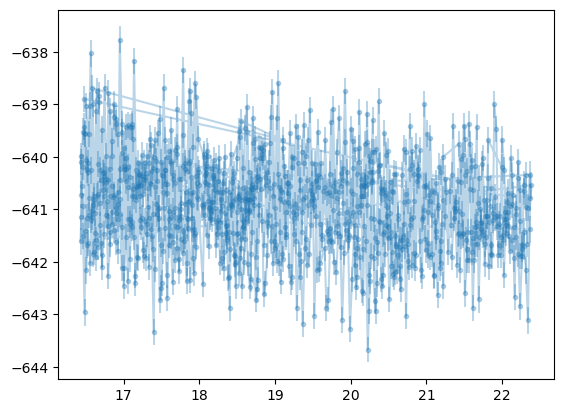

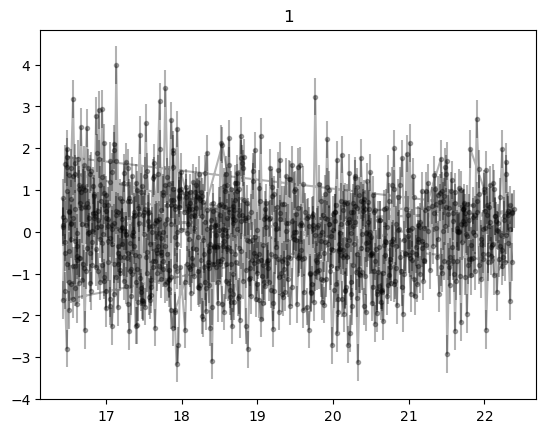

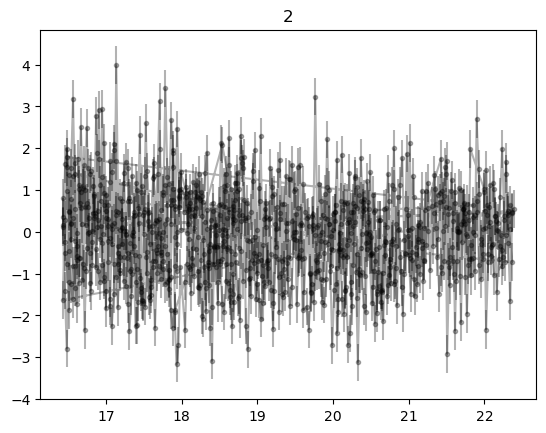

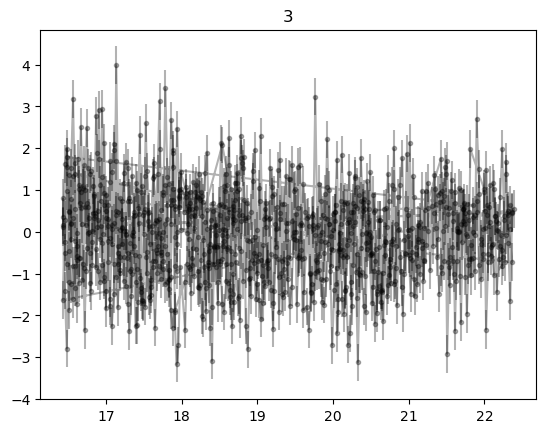

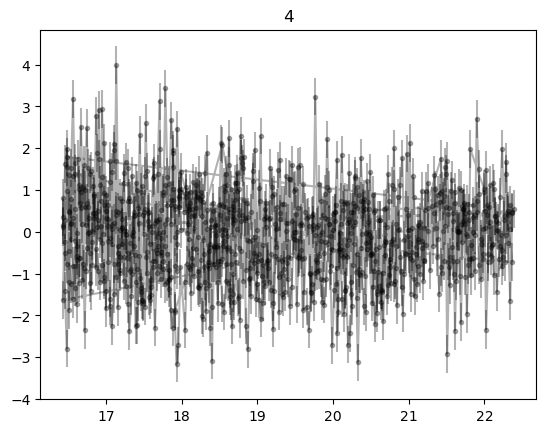

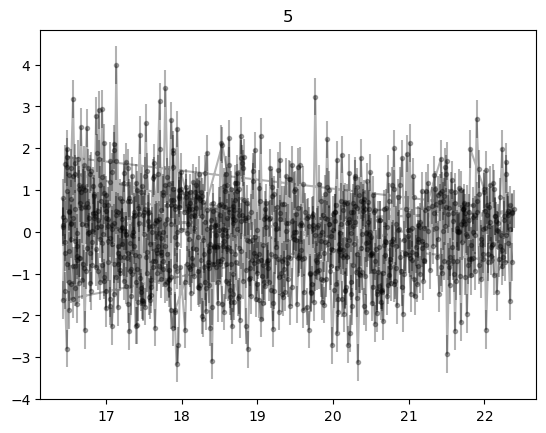

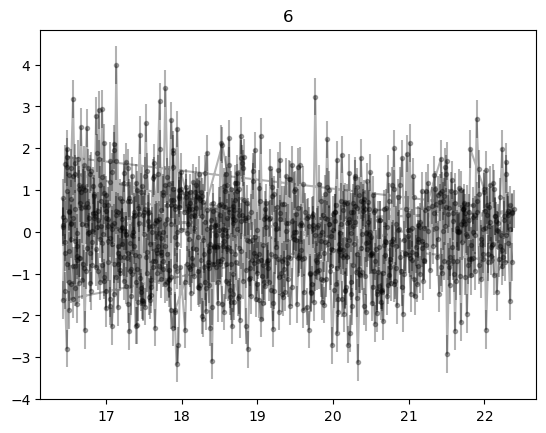

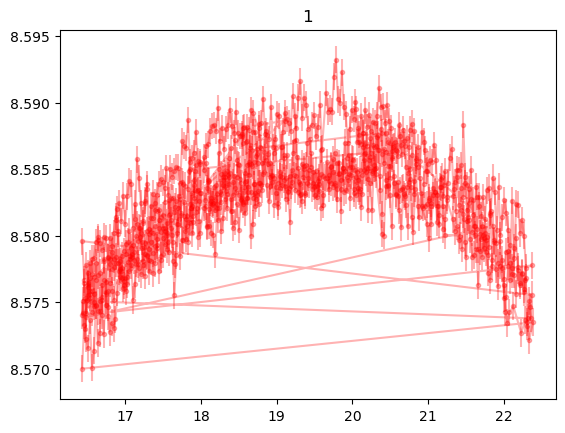

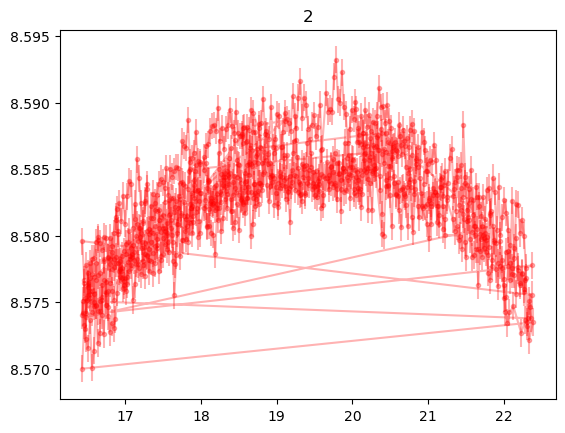

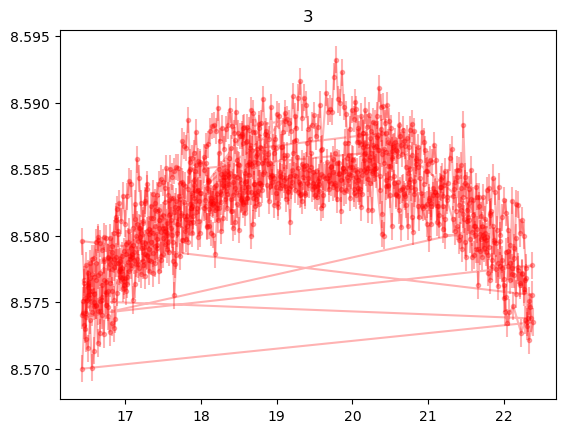

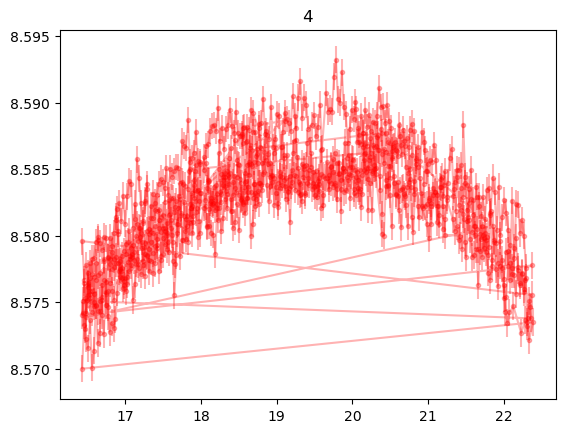

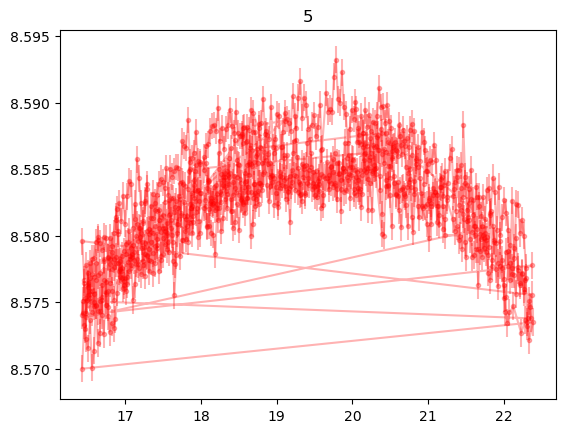

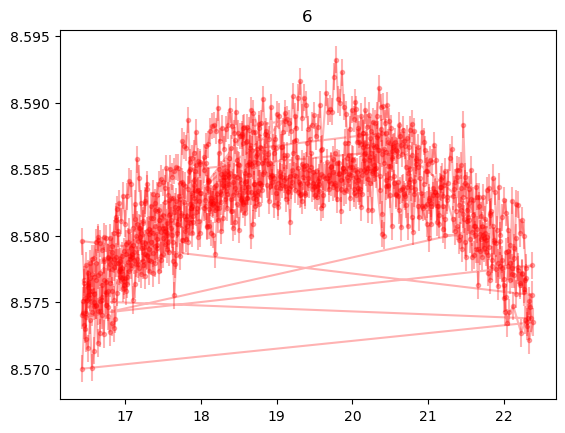

In [16]:
idx = np.arange(1000)+ 10000
plt.errorbar(time[idx], rv[idx], σrv[idx], marker='.', alpha=0.3)
plt.show()

for i in range(6):
    plt.title(str(i+1))
    plt.errorbar(time[idx], shift_spectrum[0,idx], err_shift_spectrum[0,idx], marker='.', color='k', alpha=0.3)
    plt.show()

for i in range(6):
    plt.title(str(i+1))
    plt.errorbar(time[idx], power_spectrum[0,idx], err_power_spectrum[0,idx], marker='.', color='r', alpha=0.3)
    plt.show()

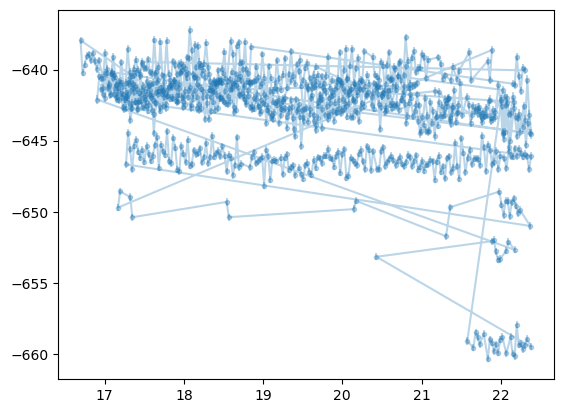

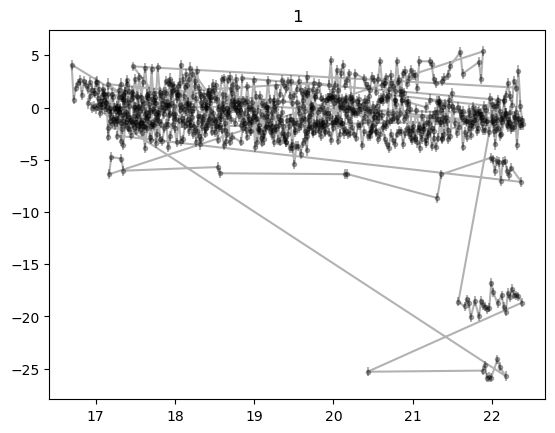

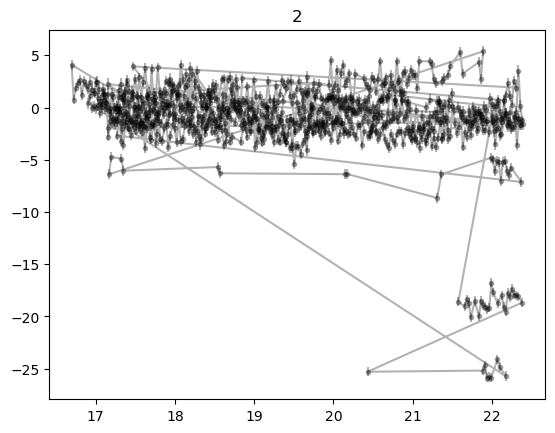

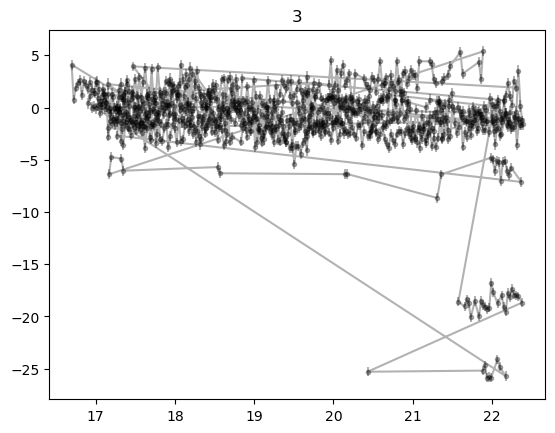

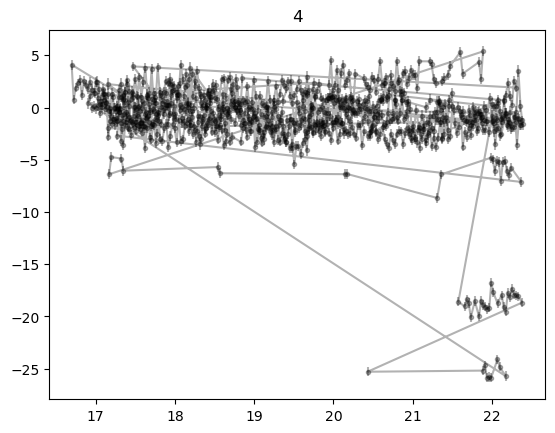

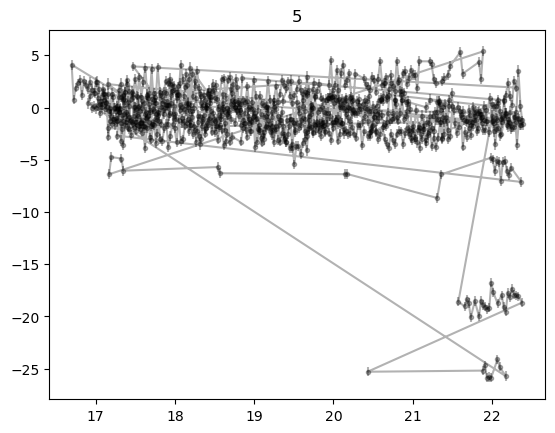

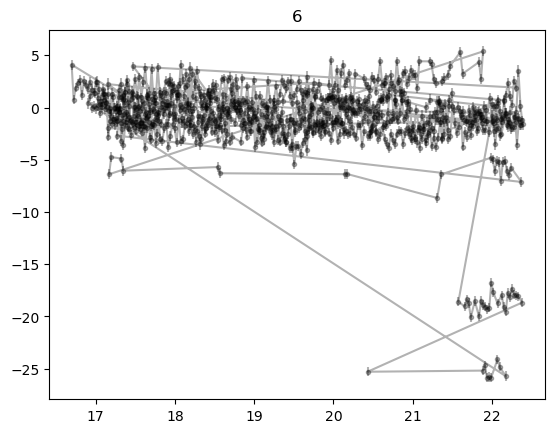

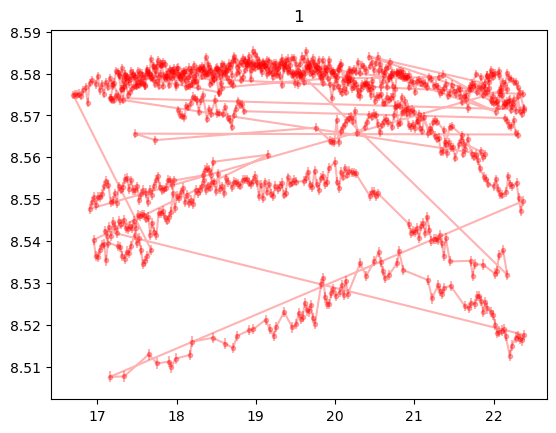

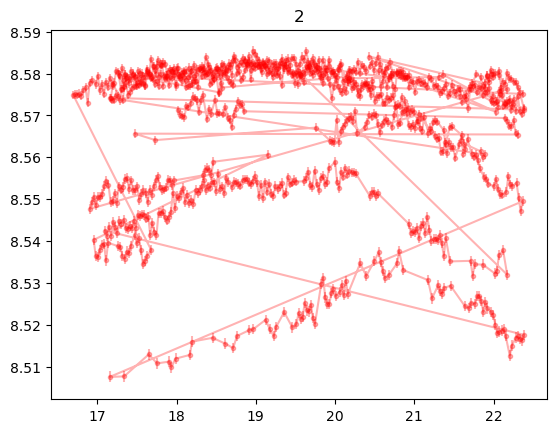

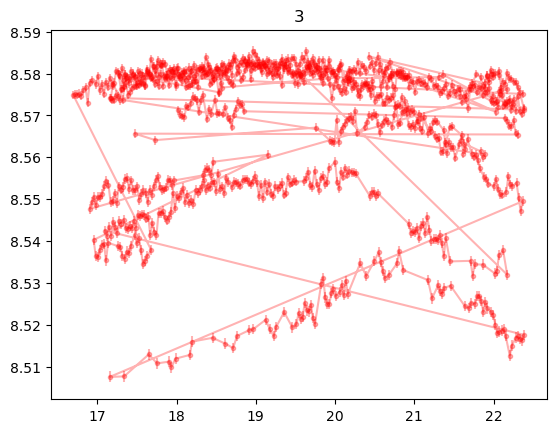

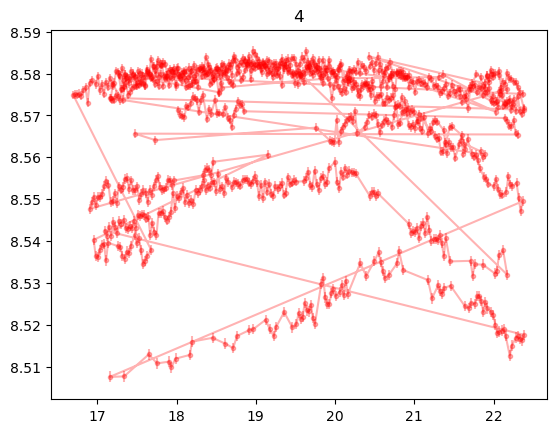

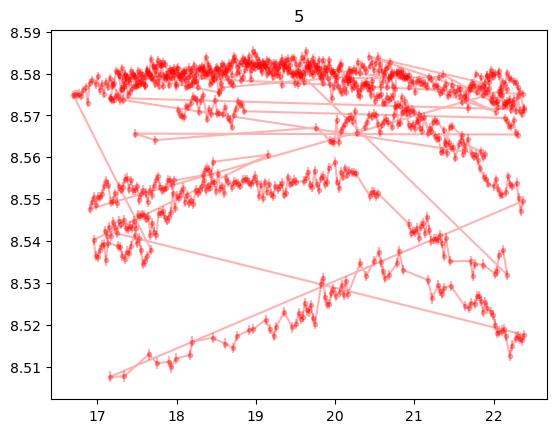

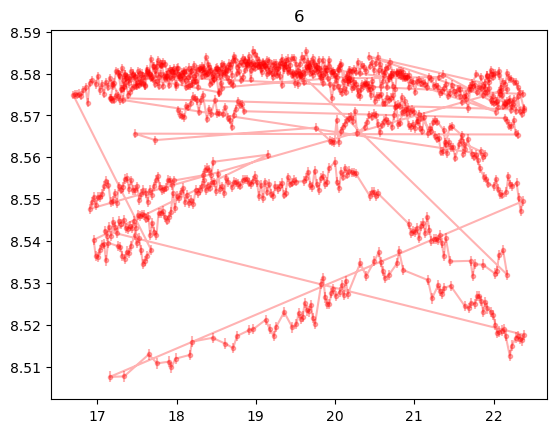

In [15]:
idx = np.arange(1000)+ 20000
plt.errorbar(time[idx], rv[idx], σrv[idx], marker='.', alpha=0.3)
plt.show()

for i in range(6):
    plt.title(str(i+1))
    plt.errorbar(time[idx], shift_spectrum[0,idx], err_shift_spectrum[0,idx], marker='.', color='k', alpha=0.3)
    plt.show()

for i in range(6):
    plt.title(str(i+1))
    plt.errorbar(time[idx], power_spectrum[0,idx], err_power_spectrum[0,idx], marker='.', color='r', alpha=0.3)
    plt.show()

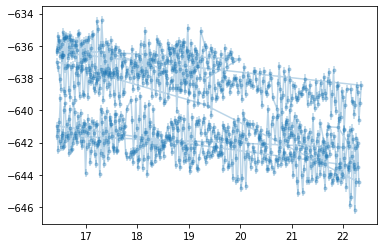

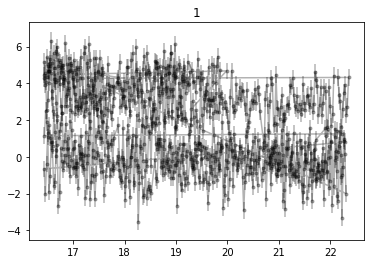

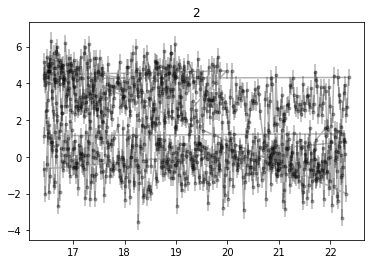

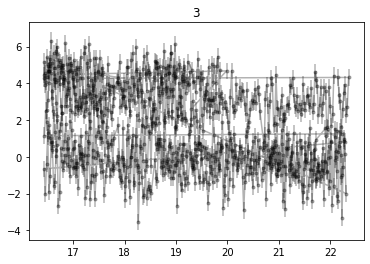

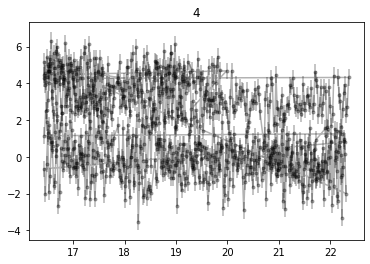

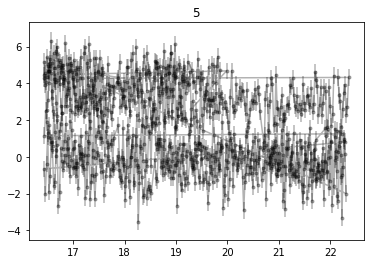

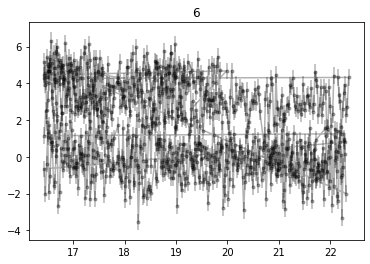

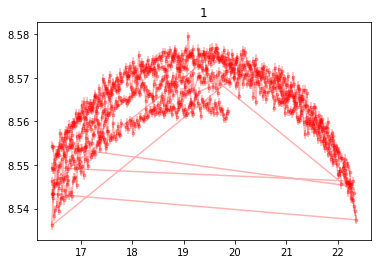

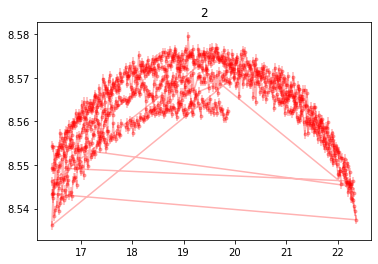

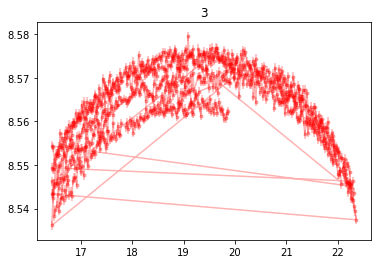

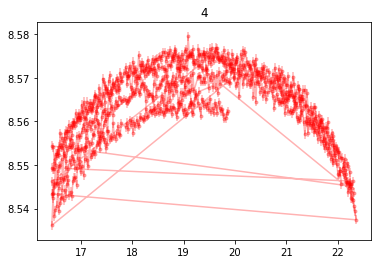

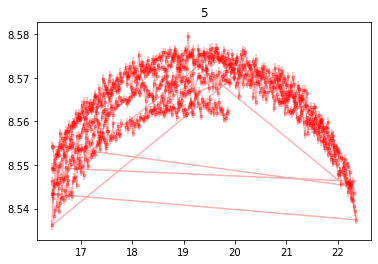

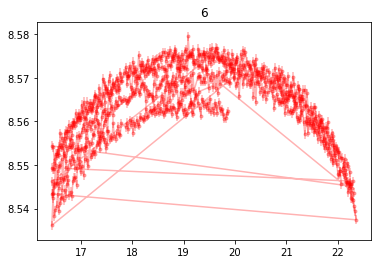

In [25]:
idx = np.arange(1000)+ 30000
plt.errorbar(time[idx], rv[idx], σrv[idx], marker='.', alpha=0.3)
plt.show()

for i in range(6):
    plt.title(str(i+1))
    plt.errorbar(time[idx], shift_spectrum[0,idx], err_shift_spectrum[0,idx], marker='.', color='k', alpha=0.3)
    plt.show()

for i in range(6):
    plt.title(str(i+1))
    plt.errorbar(time[idx], power_spectrum[0,idx], err_power_spectrum[0,idx], marker='.', color='r', alpha=0.3)
    plt.show()

In [6]:
df, shift_spectrum, err_shift_spectrum, power_spectrum, err_power_spectrum, RV_gauss = FIESTA(v_grid, CCF, σCCF, k_max=6)
shift_spectrum      *= 1000
err_shift_spectrum  *= 1000
RV_gauss            *= 1000
shift_function      = np.zeros(shift_spectrum.shape)

for i in range(shift_spectrum.shape[0]):
    shift_function[i,:] = shift_spectrum[i,:] - RV_gauss # look back; change rv_raw_daily


Velocity grid used [87.25, 110.75]

ξ_normal = 0.67


The median SNR of all CCFs is 5999
ξ_modelling_noise = 1.26


Based on the user-defined SNR = 2.0:
ξ_individual = 1.98
ξ_timeseries = 0.13

In summary, the cut-off frequency for FIESTA is recommended to be 0.13 (3 frequency modes)

        ξ  individual_SNR  ts_SNR_A  ts_SNR_ϕ  modelling noise  \
0   0.000         13382.5      27.5       0.0          0.13662   
1   0.042          8502.2      10.3     931.8          0.04870   
2   0.084          3145.1       4.5      12.4          0.01186   
3   0.126           772.9       2.5      77.9          0.00243   
4   0.168           158.0       1.3       1.5          0.00055   
5   0.211            11.9       1.0      19.4          0.00052   
6   0.253            16.4       0.9       0.9          0.00045   
7   0.295            11.1       0.9       0.8          0.00042   
8   0.337            10.1       0.8       0.8          0.00039   
9   0.379             8.8       0.7       0.7        

In [7]:
err_shift_spectrum.shape

(6, 31795)